In [154]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
def strToInt(x):
    if ',' in x or '$' in x:
        x = x.replace(',', '').replace('$', '')
        return int(x)
    else:
        x = int(x)
        return x

def strtofloat(x):
    if ',' in x:
        x = x.replace(',', '')
        x = float(x)* 1000000
        return x
    else:
        x = float(x)
        return x

In [156]:
#Cleaning up tn_movie_budgets
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['worldwide_gross'] != 0]

# CREATE AND CLEAN FRANKENSTEIN BELOW

In [157]:
#Pulling CSVs
imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv')
# imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
# imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')

In [158]:
#Cleans up some of the titles
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].map(lambda x: re.sub('[.,:-]', '', x))
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].map(lambda x: re.sub('[.,:-]', '', x))

In [159]:
# Creating Frankenstein
imdb_title_basics.set_index('tconst', inplace=True)
imdb_title_ratings.set_index('tconst', inplace=True)
imdb_title_crew.set_index('tconst', inplace=True)
imdb_frankenstein = imdb_title_basics.join(imdb_title_ratings, how='left')
imdb_frankenstein = imdb_frankenstein.join(imdb_title_crew, how='left')
imdb_frankenstein.reset_index(inplace=True)
imdb_frankenstein = imdb_frankenstein.merge(imdb_name_basics, how='left', left_on ='directors', right_on='nconst')
imdb_frankenstein.reset_index(inplace=True)

In [160]:
#Filtering to only include directors
imdb_frankenstein_bride = imdb_frankenstein[imdb_frankenstein['directors'].notna()]
# DROPPING DEAD DIRECTORS
imdb_frankenstein_bride = imdb_frankenstein_bride[imdb_frankenstein_bride['death_year'].isna()]
#DROPPING DUPLICATES IN ORIGINAL_TITLES
imdb_frankenstein_bride = imdb_frankenstein_bride.drop_duplicates(subset=['original_title'])
imdb_frankenstein_bride
# Dropping unnecessary columns
imdb_frankenstein_bride.drop(labels=['index', 'nconst', 'tconst', 'directors', 'writers', \
                                     'birth_year', 'death_year', 'primary_profession', 'known_for_titles'], \
                             axis=1, inplace=True)

In [143]:
# Merging tn_movie_budgets with frankenstein
tn_movie_monster = tn_movie_budgets.merge(imdb_frankenstein_bride, how='left', left_on='movie', right_on='primary_title')

In [161]:
#Creating top_100_directors and hard coding corrections
top_100_directors = tn_movie_monster.sort_values('worldwide_gross', ascending=False)[:100][['movie', 'primary_name', 'start_year', 'production_budget', 'worldwide_gross', 'genres']]
top_100_directors['profit'] = top_100_directors['worldwide_gross'] - top_100_directors['production_budget']
top_100_directors['primary_name'].iloc[0] = 'James Cameron'
top_100_directors['primary_name'].iloc[1] = 'James Cameron'
top_100_directors['primary_name'].iloc[2] = 'J.J. Abrams'
top_100_directors['primary_name'].iloc[3] = 'Anthony Russo'
top_100_directors['primary_name'].iloc[9] = 'David Yates'
top_100_directors['primary_name'].iloc[10] = 'Rian Johnson'
top_100_directors['primary_name'].iloc[19] = 'Kyle Balda'
top_100_directors['primary_name'].iloc[21] = 'Peter Jackson'
top_100_directors['primary_name'].iloc[22] = 'Anthony Russo'
top_100_directors['primary_name'].iloc[24] = 'Ryan Fleck'
top_100_directors['primary_name'].iloc[29] = 'Gore Verbinski'
top_100_directors['primary_name'].iloc[32] = 'Steven Spielberg'
top_100_directors['primary_name'].iloc[33] = 'Kyle Balda'
top_100_directors['primary_name'].iloc[34] = 'George Lucas'
top_100_directors['primary_name'].iloc[36] = 'Andrew Stanton'
top_100_directors['primary_name'].iloc[37] = 'Byron Howard'
top_100_directors['primary_name'].iloc[39] = 'Christopher Nolan'
top_100_directors['primary_name'].iloc[41] = 'Pierre Coffin'
top_100_directors['primary_name'].iloc[42] = 'Chris Columbus'
top_100_directors['primary_name'].iloc[44] = 'Gore Verbinski'
top_100_directors['primary_name'].iloc[45] = 'Wolfgang Reitherman'
top_100_directors['primary_name'].iloc[46] = 'David Yates'
top_100_directors['primary_name'].iloc[49] = 'David Yates'
top_100_directors['primary_name'].iloc[50] = 'Andrew Adamson'
top_100_directors['primary_name'].iloc[51] = 'Andrew Stanton'
top_100_directors['primary_name'].iloc[52] = 'David Yates'
top_100_directors['primary_name'].iloc[53] = 'Peter Jackson'
top_100_directors['primary_name'].iloc[54] = 'David Yates'
top_100_directors['primary_name'].iloc[56] = 'Sam Raimi'
top_100_directors['primary_name'].iloc[57] = 'Peter Jackson'
top_100_directors['percentage_profit'] = (top_100_directors['worldwide_gross'] / top_100_directors['production_budget']) * 100
average_director_profits = top_100_directors.groupby('primary_name').mean().sort_values('profit', ascending=False)
average_director_profits_percentage = top_100_directors.groupby('primary_name').mean().sort_values('percentage_profit', ascending=False)

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<ipython-input-162-9db517554c8a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y, size=25);


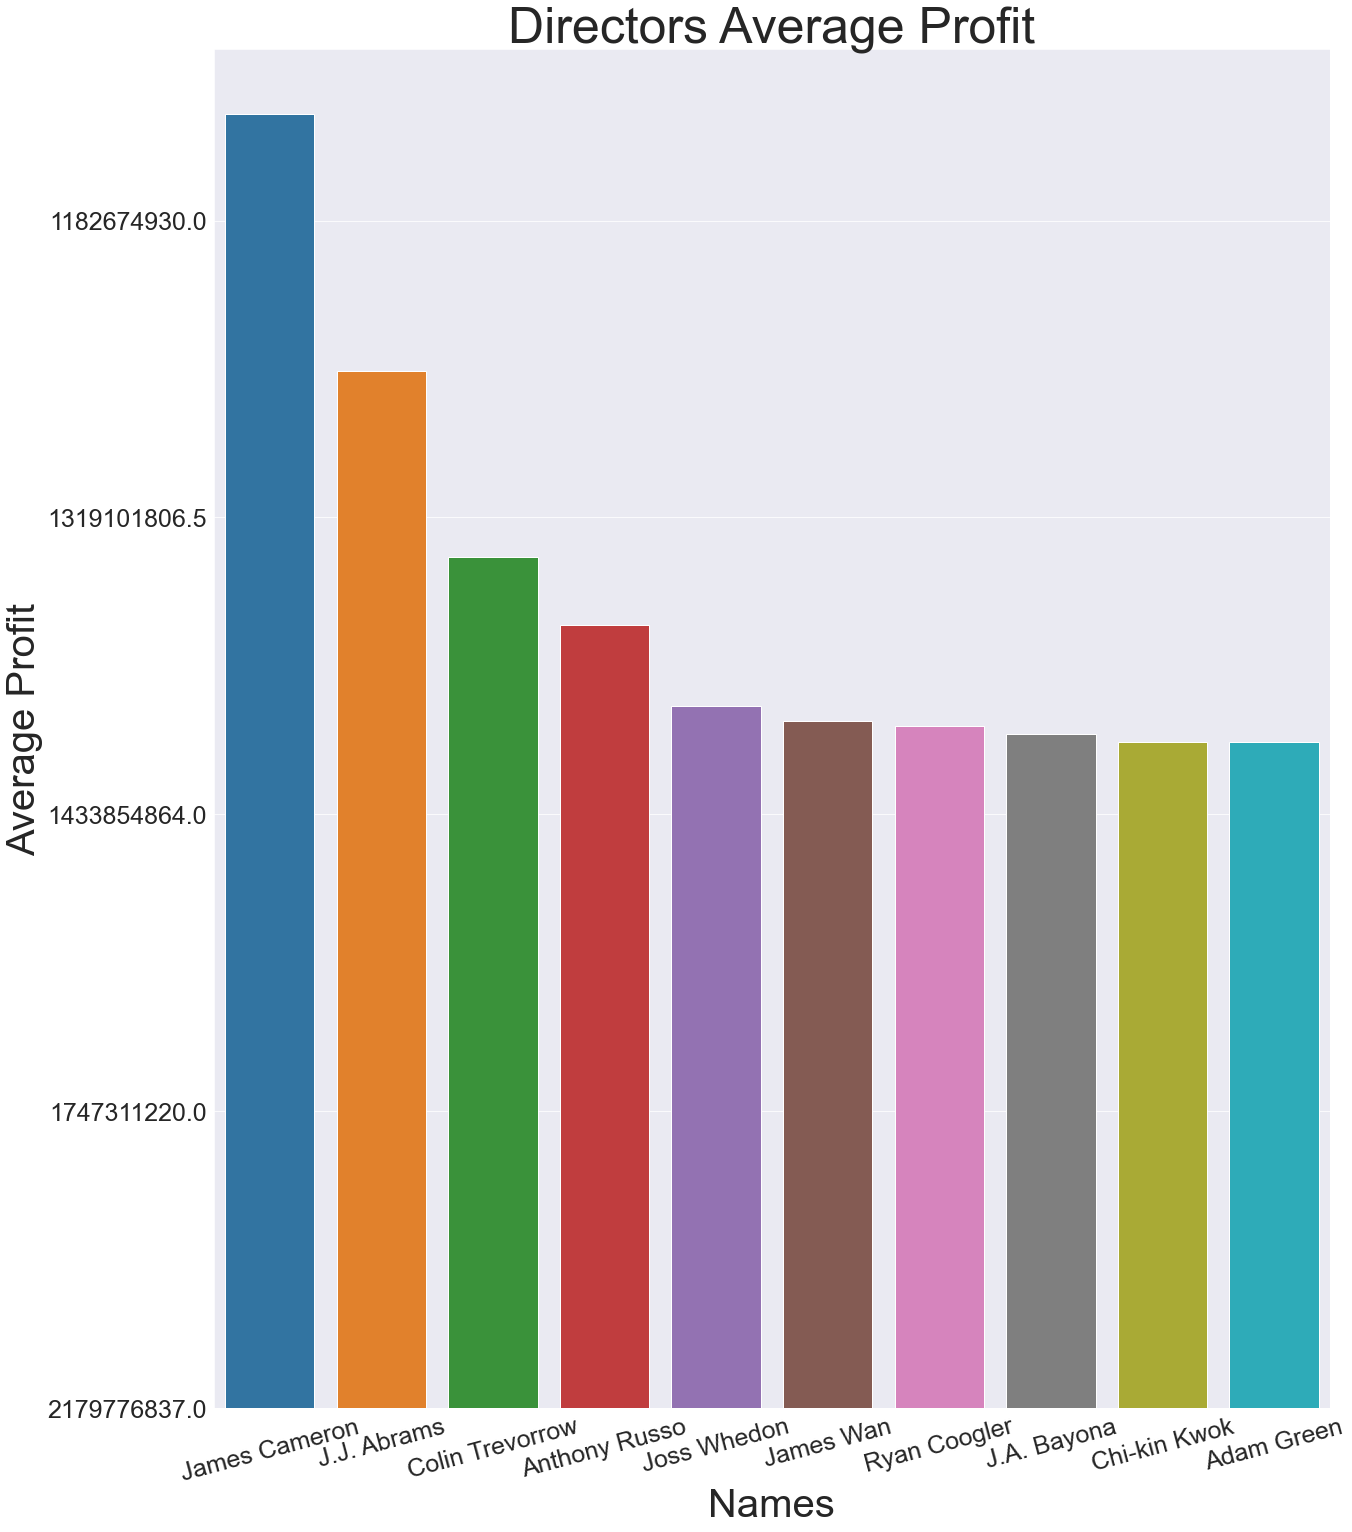

In [162]:
fig, ax = plt.subplots(figsize=(20, 25))

x = average_director_profits.index[:10]
y = average_director_profits['profit'][:10]

ax.set_title('Directors Average Profit', size=50)

sns.set_color_codes('deep')
sns.barplot(x=x, y=y)
ax.set_xlabel('Names', size=40)
ax.set_ylabel("Average Profit", size=40)
ax.set_xticklabels(x, size=25, rotation=15)
ax.set_yticklabels(y, size=25);


<ipython-input-163-babb6d67abc5>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y, size=25)


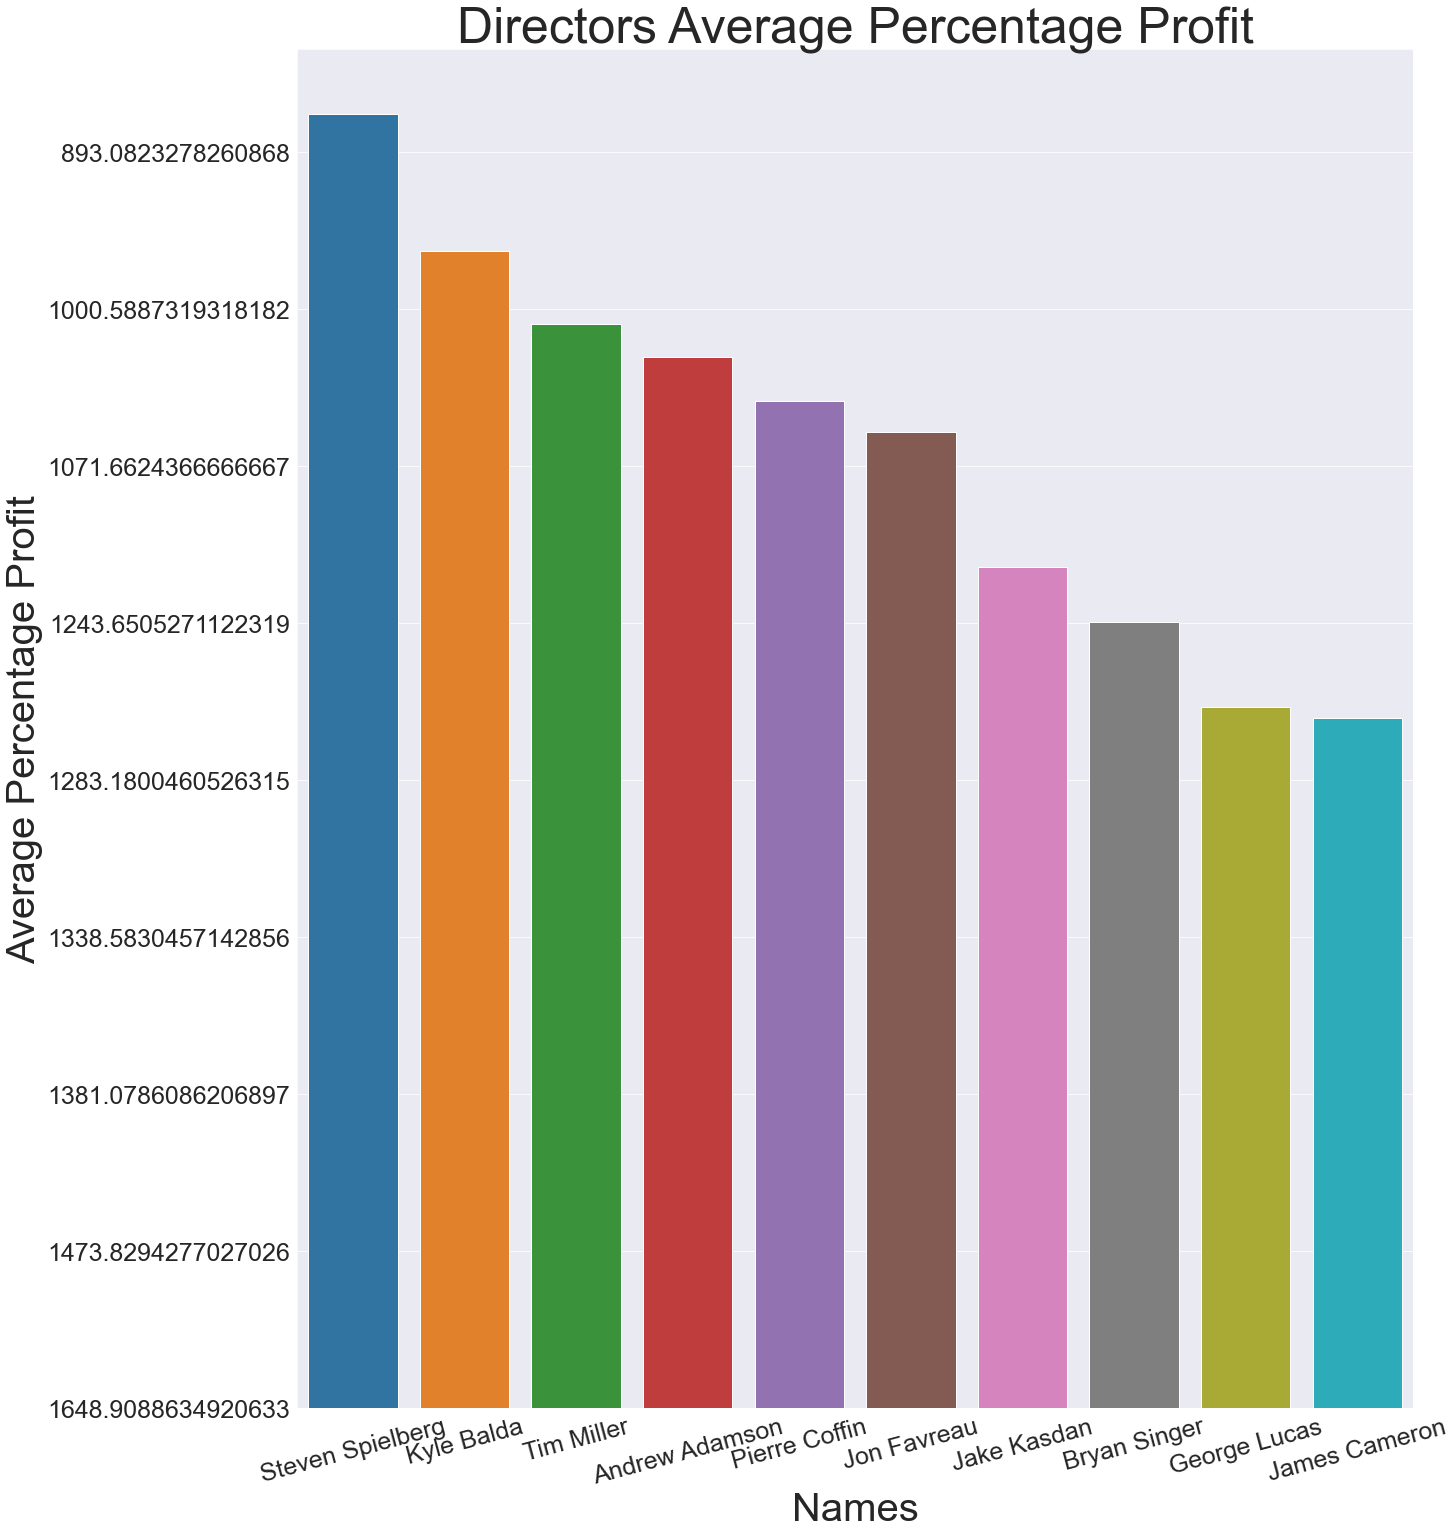

In [163]:
fig, ax = plt.subplots(figsize=(20, 25))

x = average_director_profits_percentage.index[:10]
y = average_director_profits_percentage['percentage_profit'][:10]

ax.set_title('Directors Average Percentage Profit', size=50)


sns.barplot(x=x, y=y)
ax.set_xlabel('Names', size=40)
ax.set_ylabel("Average Percentage Profit", size=40)
ax.set_xticklabels(x, size=25, rotation=15)
ax.set_yticklabels(y, size=25)
sns.set_color_codes('deep');


<ipython-input-164-0a91b6eb3e73>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, size=25)
<ipython-input-164-0a91b6eb3e73>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y, size=25)


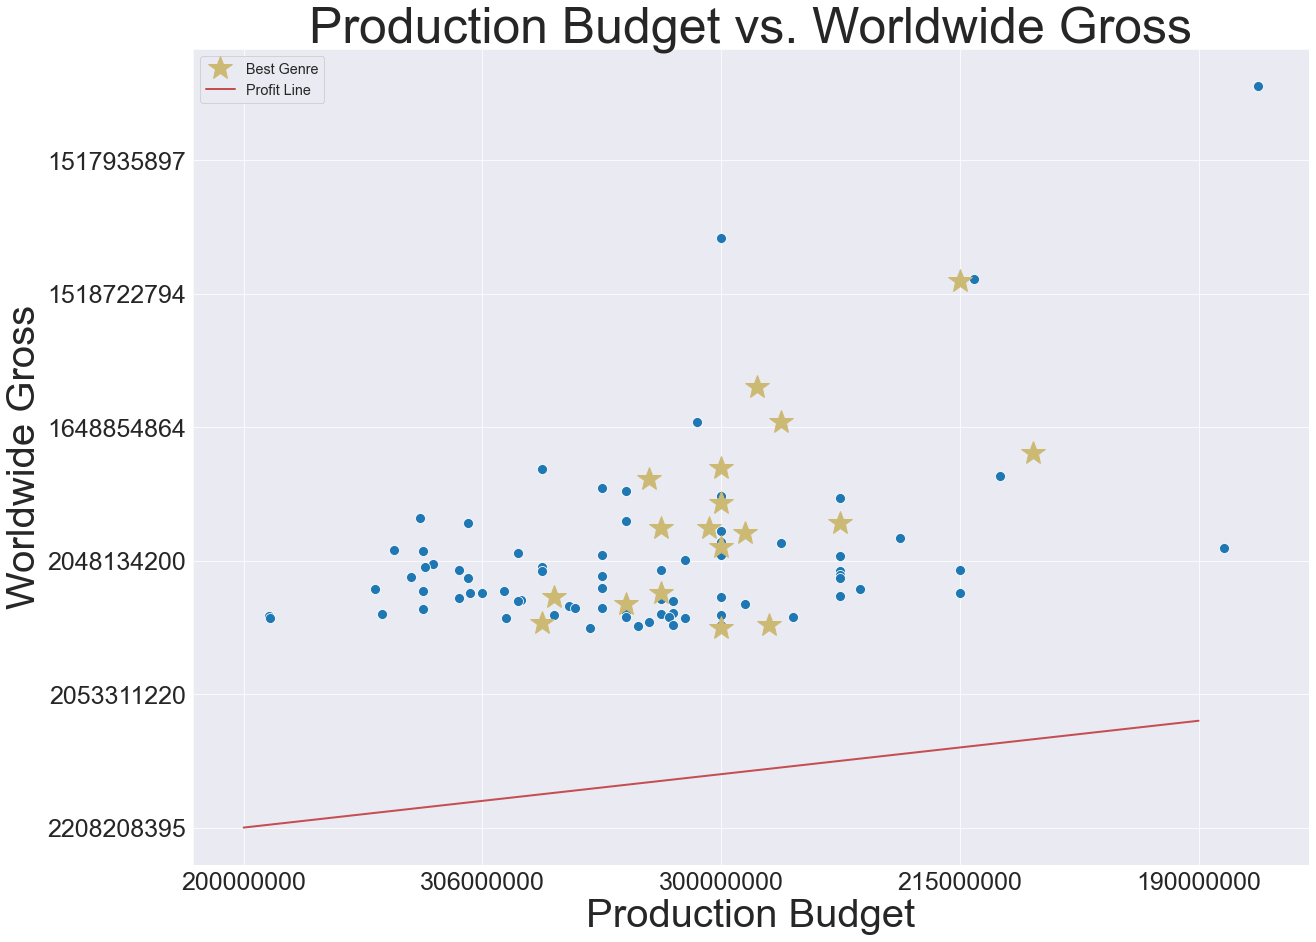

In [164]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,15))

best_genre = top_100_directors[top_100_directors['genres'] == 'Action,Adventure,Sci-Fi']
x = top_100_directors['production_budget']
y = top_100_directors['worldwide_gross']

ax.set_title('Production Budget vs. Worldwide Gross', size=50)
ax.set_xlabel('Production Budget', size=40)
ax.set_ylabel("Worldwide Gross", size=40)
ax.set_xticklabels(x, size=25)
ax.set_yticklabels(y, size=25)
sns.scatterplot(x=x, y=y, s=100)
plt.plot( 'production_budget', 'worldwide_gross', data=best_genre, linestyle='none', marker='*', markersize=25, c='y', label='Best Genre')
plt.plot([0, 400000000], [0,400000000], 'k-', lw=2, c='r', label='Profit Line')
ax.set_aspect('auto')
ax.legend(fontsize='x-large')
plt.show();